In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import Qobj, basis, qeye, identity, mesolve

## Parameters definition

In [22]:
# Grid settings
N = 200                  # Number of position points
L = 1.0                  # Length of the well (in arbitrary units)
x = np.linspace(0, L, N) # Position grid
dx = x[1] - x[0]         # Position resolution

## Operator definition

In [23]:
# Construct the finite-difference Laplacian (second derivative)
D2 = -2 * np.eye(N)
for i in range(N - 1):
    D2[i, i+1] = D2[i+1, i] = 1

T = -0.5 * Qobj(D2) / dx**2  # Kinetic energy operator

V = Qobj(np.diag(np.zeros(N)))  # Potential energy operator

H = T + V  # Total Hamiltonian


## Eigenstate equation resolution

In [25]:

eigenstates = H.eigenstates()
energies = eigenstates[0]
states = eigenstates[1]


## Plot

/usr/local/lib/python3.11/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


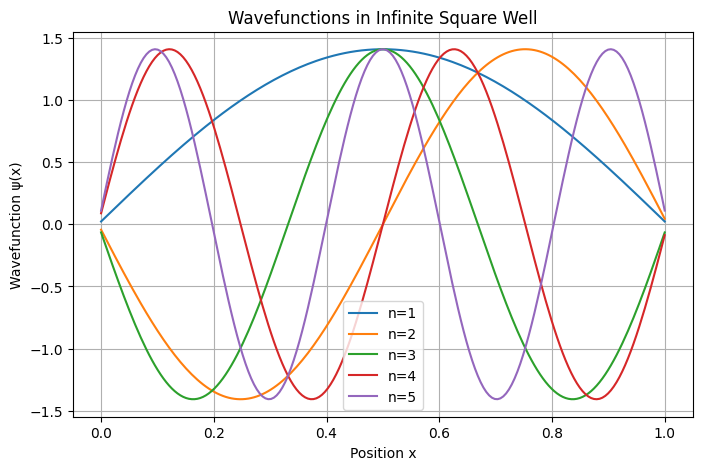

In [26]:
plt.figure(figsize=(8, 5))
for i in range(5):
    psi = states[i].full().flatten()
    plt.plot(x, psi / np.sqrt(dx), label=f'n={i+1}')
plt.title("Wavefunctions in Infinite Square Well")
plt.xlabel("Position x")
plt.ylabel("Wavefunction ψ(x)")
plt.legend()
plt.grid(True)
plt.show()